### Imports

In [47]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from scipy.spatial import Voronoi, voronoi_plot_2d

### Documentatie KMeans

In [2]:
??KMeans

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Source:        
class KMeans(_BaseKMeans):
    """K-Means clustering.

    Read more in the :ref:`User Guide <k_means>`.

    Parameters
    ----------

    n_clusters : int, default=8
        The number of clusters to form as well as the number of
        centroids to generate.

    init : {'k-means++', 'random'}, callable or array-like of shape \
            (n_clusters, n_features), default='k-means++'
        Method for initialization:

        'k-means++' : selects initial cluster centroids using sampling based on
        an empirical probability distribution of the points' contribution to the
        overall inertia. This technique speeds up convergence, and is
        theoretically proven to be :math:`\\mathcal{O}(\\log k)`-optimal.
        See the description of `n_init` for more d

### Exemplu KMeans

In [35]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=6, n_features=2, random_state=67)

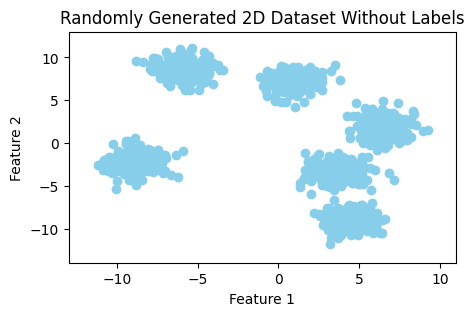

In [44]:
plt.figure(figsize=(5,3)) 
plt.scatter(X[:, 0], X[:, 1], marker='o', c='skyblue')
plt.title("Randomly Generated 2D Dataset Without Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim([-13, 11])
plt.ylim([-14, 13])
plt.show()

In [52]:
kmeans = KMeans(n_clusters=6, random_state=67)
km_labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

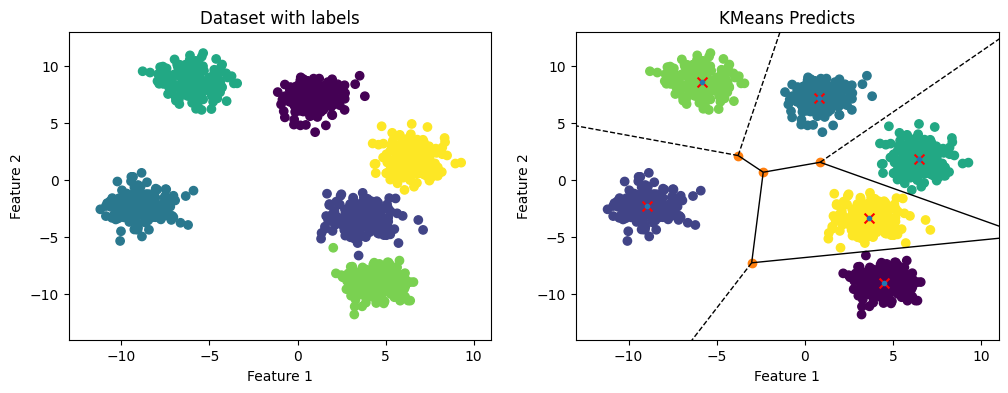

In [78]:
plt.figure(figsize=(12,4)) 
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Dataset with labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim([-13, 11])
plt.ylim([-14, 13])
vor = Voronoi(centers)
fig = voronoi_plot_2d(vor, plt.subplot(1, 2, 2))
plt.title("KMeans Predicts")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim([-13, 11])
plt.ylim([-14, 13])
plt.scatter(X[:, 0], X[:, 1], c=km_labels) 
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=50)
plt.show()

### Documentatie EM(GMM)

In [48]:
??GaussianMixture

Init signature:
GaussianMixture(
    n_components=1,
    *,
    covariance_type='full',
    tol=0.001,
    reg_covar=1e-06,
    max_iter=100,
    n_init=1,
    init_params='kmeans',
    weights_init=None,
    means_init=None,
    precisions_init=None,
    random_state=None,
    warm_start=False,
    verbose=0,
    verbose_interval=10,
)
Source:        
class GaussianMixture(BaseMixture):
    """Gaussian Mixture.

    Representation of a Gaussian mixture model probability distribution.
    This class allows to estimate the parameters of a Gaussian mixture
    distribution.

    Read more in the :ref:`User Guide <gmm>`.

    .. versionadded:: 0.18

    Parameters
    ----------
    n_components : int, default=1
        The number of mixture components.

    covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
        String describing the type of covariance parameters to use.
        Must be one of:

        - 'full': each component has its own general covariance matri

### Exemplu EM(GMM)

In [72]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=6, n_features=2, random_state=67)

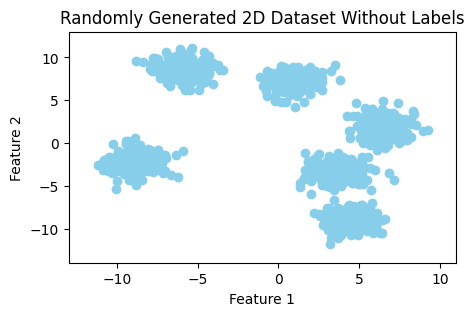

In [73]:
plt.figure(figsize=(5,3)) 
plt.scatter(X[:, 0], X[:, 1], marker='o', c='skyblue')
plt.title("Randomly Generated 2D Dataset Without Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim([-13, 11])
plt.ylim([-14, 13])
plt.show()

In [74]:
gm = GaussianMixture(n_components=6, random_state=67)
gm_labels = gm.fit_predict(X)
centers = gm.means_

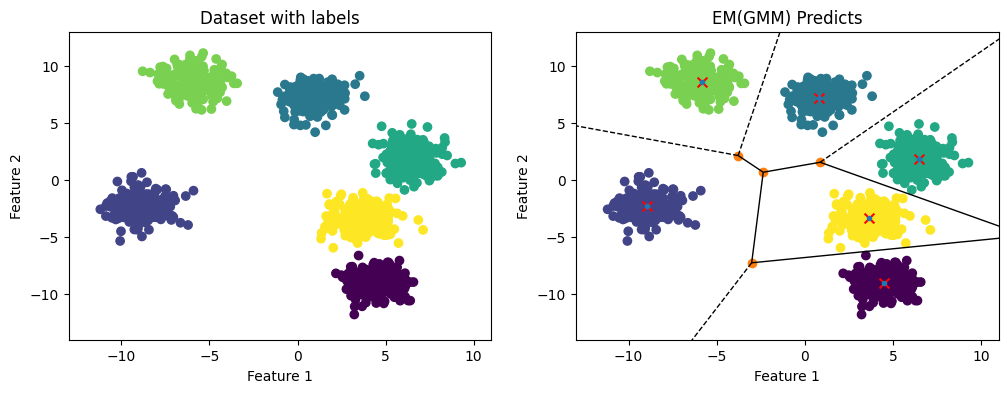

In [82]:
plt.figure(figsize=(12,4)) 
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=gm_labels)
plt.title("Dataset with labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim([-13, 11])
plt.ylim([-14, 13])
vor = Voronoi(centers)
fig = voronoi_plot_2d(vor, plt.subplot(1, 2, 2))
plt.title("EM(GMM) Predicts")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim([-13, 11])
plt.ylim([-14, 13])
plt.scatter(X[:, 0], X[:, 1], c=gm_labels) 
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=50)
plt.show()